In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
rng = np.random

In [19]:
learning_rate = 0.001
trainning_steps = 10000
display_step = 50

In [26]:
data = np.loadtxt("c_1.csv", delimiter = ',', dtype = np.float64)

x_data = data[:6000, [0]]
y_data = data[:6000, [-1]]

print(data)
print(x_data)

n_samples = x_data.shape[0]
print(n_samples)

[[14.8 11.6]
 [13.6 10.3]
 [12.3  9.8]
 ...
 [14.2 16. ]
 [14.3 15.8]
 [13.8 15.3]]
[[14.8]
 [13.6]
 [12.3]
 ...
 [ 2.8]
 [ 2.5]
 [ 2.2]]
6000


In [27]:
W = tf.Variable(rng.random(), name = 'weight')
b = tf.Variable(rng.random(), name = 'bias')

In [28]:
def linear_regression(x):
    return W * x + b

def mean_square(y_pred, y_true):
    return tf.reduce_sum(tf.pow(y_pred - y_true, 2)) / (2 * n_samples)

optimizer = tf.optimizers.SGD(learning_rate)

In [29]:
def run_optimization():
    with tf.GradientTape() as g:
        pred = linear_regression(x_data)
        loss = mean_square(pred, y_data)
    
    gradients = g.gradient(loss, [W, b])

    optimizer.apply_gradients(zip(gradients, [W, b]))

In [30]:
for step in range(1, trainning_steps + 1):
    run_optimization()
    
    if step % display_step == 0:
        pred = linear_regression(x_data)
        loss = mean_square(pred, y_data)
        
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 50, loss: 2.682141, W: 0.971308, b: 0.356106
step: 100, loss: 2.668257, W: 0.972527, b: 0.329785
step: 150, loss: 2.654611, W: 0.973736, b: 0.303692
step: 200, loss: 2.641201, W: 0.974934, b: 0.277825
step: 250, loss: 2.628024, W: 0.976122, b: 0.252183
step: 300, loss: 2.615072, W: 0.977300, b: 0.226762
step: 350, loss: 2.602345, W: 0.978468, b: 0.201561
step: 400, loss: 2.589835, W: 0.979625, b: 0.176578
step: 450, loss: 2.577543, W: 0.980773, b: 0.151812
step: 500, loss: 2.565462, W: 0.981910, b: 0.127260
step: 550, loss: 2.553590, W: 0.983038, b: 0.102921
step: 600, loss: 2.541922, W: 0.984156, b: 0.078793
step: 650, loss: 2.530456, W: 0.985264, b: 0.054873
step: 700, loss: 2.519188, W: 0.986363, b: 0.031161
step: 750, loss: 2.508113, W: 0.987452, b: 0.007654
step: 800, loss: 2.497230, W: 0.988531, b: -0.015649
step: 850, loss: 2.486534, W: 0.989602, b: -0.038751
step: 900, loss: 2.476023, W: 0.990663, b: -0.061652
step: 950, loss: 2.465693, W: 0.991715, b: -0.084355
step: 100

step: 7700, loss: 1.933239, W: 1.074910, b: -1.880033
step: 7750, loss: 1.932270, W: 1.075233, b: -1.886989
step: 7800, loss: 1.931317, W: 1.075552, b: -1.893885
step: 7850, loss: 1.930379, W: 1.075869, b: -1.900721
step: 7900, loss: 1.929459, W: 1.076183, b: -1.907498
step: 7950, loss: 1.928555, W: 1.076494, b: -1.914216
step: 8000, loss: 1.927666, W: 1.076803, b: -1.920876
step: 8050, loss: 1.926792, W: 1.077108, b: -1.927479
step: 8100, loss: 1.925934, W: 1.077412, b: -1.934024
step: 8150, loss: 1.925089, W: 1.077712, b: -1.940512
step: 8200, loss: 1.924261, W: 1.078010, b: -1.946945
step: 8250, loss: 1.923446, W: 1.078306, b: -1.953321
step: 8300, loss: 1.922644, W: 1.078599, b: -1.959643
step: 8350, loss: 1.921858, W: 1.078889, b: -1.965909
step: 8400, loss: 1.921085, W: 1.079177, b: -1.972122
step: 8450, loss: 1.920325, W: 1.079462, b: -1.978280
step: 8500, loss: 1.919577, W: 1.079745, b: -1.984386
step: 8550, loss: 1.918843, W: 1.080026, b: -1.990438
step: 8600, loss: 1.918121, 

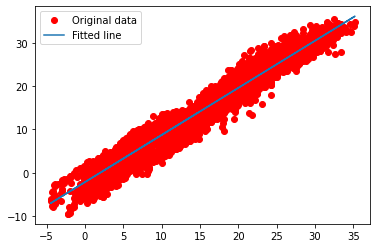

In [31]:
plt.plot(x_data, y_data, 'ro', label = 'Original data')
plt.plot(x_data, np.array(W * x_data + b), label = 'Fitted line')
plt.legend()
plt.show()